# Proyek Sistem Rekomendasi: [Amazon Sales Dataset](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset)
- **Nama:** Nafa Khairunnisa
- **Email:** nkhairunn2412@gmail.com
- **ID Dicoding:** nafa-khairunnisa

## Import Libraries

In [ ]:
!pip uninstall -y numpy scikit-surprise
!pip install numpy==1.24.3 scikit-surprise

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scikit-surprise 1.1.4
Uninstalling scikit-surprise-1.1.4:
  Successfully uninstalled scikit-surprise-1.1.4
  Using cached scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 89.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incom

In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505204 sha256=91d51b29d8966a232844fe44840d105ce0c58a75edefdb5b013faaa5ce51f9b6
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
# Library yang sering digunakan
import os
import re
import shutil
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
%matplotlib inline
import seaborn as sns

In [ ]:
# Library untuk data preparation
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Library untuk modeling
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVDpp
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy

In [ ]:
# Library untuk text preprocessing
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download semua resource yang relevan
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Data Loading

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Cek apakah file tersedia
!ls /content/drive/MyDrive/kaggle/

Mounted at /content/drive
kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Membuat folder .kaggle
os.makedirs("/root/.kaggle", exist_ok=True)

# Memindahkan kaggle.json dari folder di Google Drive ke folder .kaggle
shutil.move('/content/drive/MyDrive/kaggle/kaggle.json', '/root/.kaggle/kaggle.json')

# Mengubah permission agar hanya bisa dibaca oleh user
os.chmod('/root/.kaggle/kaggle.json', 600)

In [ ]:
# Download dataset dari Kaggle
!kaggle datasets download -d karkavelrajaj/amazon-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset
License(s): CC-BY-NC-SA-4.0


In [ ]:
# Unzip file dataset
!unzip amazon-sales-dataset.zip

Archive:  amazon-sales-dataset.zip
  inflating: amazon.csv              


In [ ]:
# Memuat file csv ke dalam DataFrame
df = pd.read_csv('/content/amazon.csv')

# Menampilkan DataFrame
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## Data Understanding

### Deskripsi Variabel

In [ ]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
print(df.shape)

(1465, 16)


Insights:

- Dataset memiliki total 1465 sampel.
- Memiliki 16 fitur.
- Semua fitur bertipe data object.
- Nilai unique setiap fitur bervariasi.

### Cek Missing value

In [ ]:
df.isna().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


**Insight**:

Hanya fitur rating_count yang memiliki missing value

### Cek Duplikat Data

In [ ]:
df.duplicated().sum()

0

**Insights**:

Dataset tidak memiliki data duplikat.

### Univariate Data Analysis

In [ ]:
df['category'].value_counts().head(5)

,count
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52


**Insights**:

- Kategori di setiap transaksi bertingkat (memilik hierarki).
- 'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables' merupakan category yang paling banyak muncul.

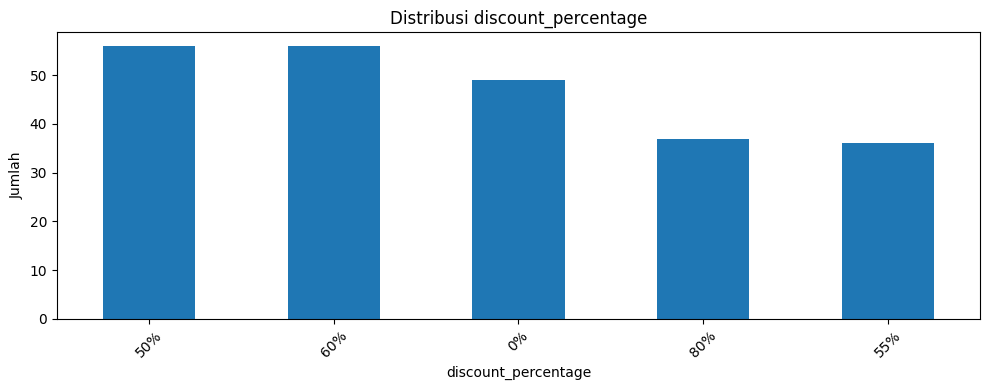

In [ ]:
# Plot distribusi 'discount_percentage'
plt.figure(figsize=(10, 4))
df['discount_percentage'].value_counts().head(5).plot(kind='bar') # menampilkan 5 teratas
plt.title(f'Distribusi discount_percentage')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights**:

Persentase diskon yang paling banyak muncul yaitu 50%, 60%, 0%, 80%, dan 55%.

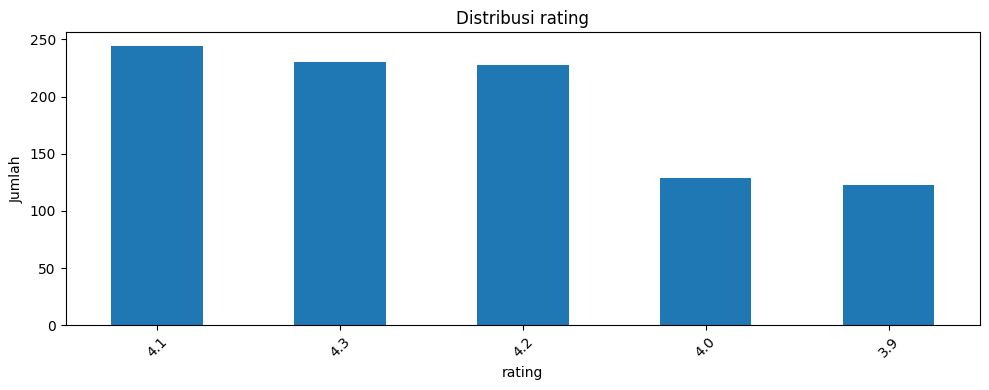

In [ ]:
# Plot distribusi 'rating'
plt.figure(figsize=(10, 4))
df['rating'].value_counts().head(5).plot(kind='bar') # menampilkan 5 teratas
plt.title(f'Distribusi rating')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insights**:

Rating yang diberikan paling banyak berada pada nilai 4.1, 4.3, 4.2, 4.0, dan 3.9. Artinya kualitas produk baik.

## Model Development dengan Content Based Filtering

### Data Preparation

In [ ]:
# Menyalin fitur yang akan digunakan
preparation_df = df[['product_name', 'category', 'about_product',
                     'discounted_price', 'actual_price',
                     'discount_percentage', 'rating', 'rating_count']].copy()

In [ ]:
preparation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_name         1465 non-null   object
 1   category             1465 non-null   object
 2   about_product        1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
dtypes: object(8)
memory usage: 91.7+ KB


In [ ]:
preparation_df.head()

,product_name,category,about_product,discounted_price,actual_price,discount_percentage,rating,rating_count
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,High Compatibility : Compatible With iPhone 12...,₹399,"₹1,099",64%,4.2,"24,269"
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"Compatible with all Type C enabled devices, be...",₹199,₹349,43%,4.0,"43,994"
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,【 Fast Charger& Data Sync】-With built-in safet...,₹199,"₹1,899",90%,3.9,"7,928"
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,The boAt Deuce USB 300 2 in 1 cable is compati...,₹329,₹699,53%,4.2,"94,363"
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,₹154,₹399,61%,4.2,"16,905"


In [ ]:
# Cek duplikat
preparation_df.duplicated().sum()

84

In [ ]:
# Menghapus data duplikat
preparation_df = preparation_df.drop_duplicates()
print(preparation_df.shape)

(1381, 8)


In [ ]:
# Mengisi nilai NaN dengan 0 kemudian menghapus koma pada rating_count dan mengonversinya ke int
preparation_df['rating_count'] = preparation_df['rating_count'].str.replace(',', '').fillna('0').astype(int)

In [ ]:
# Mengecek nilai rating
preparation_df['rating'].unique()

array(['4.2', '4.0', '3.9', '4.1', '4.3', '4.4', '4.5', '3.7', '3.3',
       '3.6', '3.4', '3.8', '3.5', '4.6', '3.2', '5.0', '4.7', '3.0',
       '2.8', '4', '3.1', '4.8', '2.3', '|', '2', '3', '2.6', '2.9'],
      dtype=object)

In [ ]:
# Mengonversi kolom rating menjadi float, mengganti nilai non-numerik (seperti '|') dengan NaN
preparation_df['rating'] = pd.to_numeric(preparation_df['rating'], errors='coerce')

# Menangani NaN dengan rata-rata rating
preparation_df['rating'] = preparation_df['rating'].fillna(preparation_df['rating'].mean())

# Memeriksa hasil
print(preparation_df['rating'].head())

0    4.2
1    4.0
2    3.9
3    4.2
4    4.2
Name: rating, dtype: float64


In [ ]:
# Mengganti tanda ₹ menjadi , dan mengonversi tipe data ke float
def clean_price(price_str):
    return float(price_str.replace('₹', '').replace(',', '').strip())

preparation_df['discounted_price'] = preparation_df['discounted_price'].apply(clean_price)
preparation_df['actual_price'] = preparation_df['actual_price'].apply(clean_price)

In [ ]:
# Menghilangkan tanda % dan konversi ke tipe float
preparation_df['discount_percentage'] = preparation_df['discount_percentage'].str.replace('%', '').astype(float)

Fitur category pada setiap produk terdiri dari beberapa tingkatan (misalnya: Electronics | Computers | Cables). Oleh karena itu, category, product_name, dan about_product digabungkan ke dalam satu kolom teks gabungan (content_text) sebagai representasi deskriptif dari setiap produk. Selain itu, kategori yang paling spesifik (bagian paling kanan setelah simbol "|") juga diekstrak secara terpisah untuk eksplorasi.

In [ ]:
# Memuat model bahasa Inggris spaCy
nlp = spacy.load("en_core_web_sm")

# Fungsi preprocessing dengan spaCy
def preprocess_text(text):
    # Mengubah teks menjadi huruf kecil
    text = str(text).lower()
    # Mengganti karakter selain huruf dengan spasi
    text = re.sub(r'[^a-z\s]', ' ', text)

    # Tokenisasi dan lemmatization dengan spaCy
    doc = nlp(text)

    # Menghapus stop words dan melakukan lemmatization
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    # Menggabungkan token menjadi satu string
    return ' '.join(tokens)

In [ ]:
# Mengambil kategori paling spesifik (setelah tanda "|")
preparation_df['category_last'] = preparation_df['category'].apply(lambda x: str(x).split('|')[-1])

# Menggabungkan semua deskripsi produk
preparation_df['content_text'] = preparation_df['product_name'].astype(str) + ' ' + \
                     preparation_df['about_product'].astype(str) + ' ' + \
                     preparation_df['category_last'].astype(str)

# Text Preprocessing
preparation_df['content_clean'] = preparation_df['content_text'].apply(preprocess_text)

In [ ]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada kolom numerik
numeric_columns = ['discounted_price', 'actual_price', 'rating_count']

preparation_df[numeric_columns] = scaler.fit_transform(preparation_df[numeric_columns])

In [ ]:
# Menyalin fitur numerik yang sudah dibersihkan ke dataframe baru
numerical_features = preparation_df[numeric_columns].copy()

In [ ]:
# TF-IDF untuk fitur teks
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(preparation_df['content_clean'])

### Modeling

In [ ]:
# Gabungkan TF-IDF + numerik (hasil = matriks gabungan)
combined_features = hstack([tfidf_matrix, numerical_features])

In [ ]:
# Compute cosine similarity
cosine_sim = cosine_similarity(combined_features)

In [ ]:
# Konversi ke DataFrame untuk memudahkan indexing
cosine_sim_df = pd.DataFrame(cosine_sim, index=preparation_df.index, columns=preparation_df.index)

### Mendapatkan Rekomendasi

In [ ]:
def content_based_recommendation(product_index, similarity_matrix, products_df, k=10, threshold=0.9):
    """
    Memberikan rekomendasi produk serupa berdasarkan kemiripan konten produk.

    Parameters:
    ---
    product_index : int
        Indeks produk yang ingin dicari rekomendasinya.
    similarity_matrix : pd.DataFrame
        Matriks cosine similarity antar produk.
    products_df : pd.DataFrame
        Data produk (minimal harus mengandung nama produk dan interest).
    k : int
        Jumlah rekomendasi yang dihasilkan.
    """
    similarity_scores = similarity_matrix.iloc[product_index]
    similarity_scores = similarity_scores.drop(product_index)  # Exclude self
    filtered = similarity_scores[similarity_scores > threshold]  # Filter by threshold
    top_k = filtered.sort_values(ascending=False).head(k)  # Take top-k
    recommended_products = products_df.iloc[top_k.index].copy()
    recommended_products['Similarity_Score'] = top_k.values
    return recommended_products

In [ ]:
df.iloc[10]

,10
product_id,B08CF3D7QR
product_name,Portronics Konnect L POR-1081 Fast Charging 3A...
category,Computers&Accessories|Accessories&Peripherals|...
discounted_price,₹154
actual_price,₹339
discount_percentage,55%
rating,4.3
rating_count,"13,391"
about_product,[CHARGE & SYNC FUNCTION]- This cable comes wit...
user_id,"AGYLPKPZHVYKKZHOTHCTYVEDAJ4A,AGTTU64JMX722LYCN..."


In [ ]:
# Rekomendasi untuk produk ke-10
recommendations = content_based_recommendation(
    product_index=10,
    similarity_matrix=cosine_sim_df,  # <-- gunakan DataFrame di sini
    products_df=df[['product_name', 'category', 'discounted_price']],
    k=10,
    threshold=0.2
)

recommendations

,product_name,category,discounted_price,Similarity_Score
14,Portronics Konnect L 1.2M POR-1401 Fast Chargi...,Computers&Accessories|Accessories&Peripherals|...,₹159,0.853435
428,Portronics Konnect L POR-1081 Fast Charging 3A...,Computers&Accessories|Accessories&Peripherals|...,₹154,0.842072
115,Portronics Konnect L POR-1403 Fast Charging 3A...,Computers&Accessories|Accessories&Peripherals|...,₹210,0.833218
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,0.804674
59,"Portronics Konnect L 1.2Mtr, Fast Charging 3A ...",Computers&Accessories|Accessories&Peripherals|...,₹154,0.786607
454,Portronics Konnect CL 20W POR-1067 Type-C to 8...,Computers&Accessories|Accessories&Peripherals|...,₹350,0.520841
13,Portronics Konnect CL 20W POR-1067 Type-C to 8...,Computers&Accessories|Accessories&Peripherals|...,₹350,0.520841
486,FLiX (Beetel) USB to Type C PVC Data Sync & 2A...,Computers&Accessories|Accessories&Peripherals|...,₹139,0.462835
223,Portronics Konnect L 60W PD Type C to Type C M...,Computers&Accessories|Accessories&Peripherals|...,₹249,0.460198
81,Flix (Beetel) Usb To Type C Pvc Data Sync And ...,Computers&Accessories|Accessories&Peripherals|...,₹139,0.458636


### Evaluasi

Sistem rekomendasi dapat dievaluasi menggunakan metrik Precision@K, sebagaimana dijelaskan di situs [evidentlyai](https://www.evidentlyai.com/ranking-metrics/evaluating-recommender-systems).

Rumus yang digunakan adalah:

```
Precision@K = Jumlah rekomendasi yang relevan/Jumlah rekomendasi yang diberikan
```

Fitur yang dijadikan evaluasi di sini Product_Category_Preference.

In [ ]:
# Fungsi Precision@K
def precision_at_k(recommended_indices, relevant_indices, k):
    if k == 0:
        return 0.0
    recommended_at_k = recommended_indices[:k]
    relevant_recommended = [idx for idx in recommended_at_k if idx in relevant_indices]
    return len(relevant_recommended) / k

In [ ]:
# Mengambil category_last dari preparation_df
target_category = preparation_df.loc[10, 'category_last']

# Mencari indeks produk lain dengan kategori sama
relevant_indices = set(preparation_df[preparation_df['category_last'] == target_category].index) - {10}

# Mengambil indeks produk yang direkomendasikan
recommended_indices = recommendations.index.tolist()

# Hitung Precision@10
p_at_10 = precision_at_k(recommended_indices, relevant_indices, k=10)
print(f"Precision@10: {p_at_10:.2f}")

Precision@10: 1.00


Berdasarkan hasi metrik evaluasi, precision@K sebesar 100%. Artinya, dari setiap 10 produk yang direkomendasikan oleh sistem, semua produk memang relevan (satu kategori dengan produk yang sedang dievaluasi).

## Model Development dengan Collaborative Filtering

### Data Preparation

In [ ]:
# Memilih fitur relevan untuk user-based collaborative filtering
cf_preparation = df[['user_id', 'product_id', 'rating']].copy()

# Menampilkan beberapa baris pertama
cf_preparation.head()

,user_id,product_id,rating
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,4.2
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,4.0
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,3.9
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,4.2
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,4.2


In [ ]:
# Cek duplikat
cf_preparation.duplicated().sum()

104

In [ ]:
# Menghapus data duplikat
cf_preparation = cf_preparation.drop_duplicates()
print(cf_preparation.shape)

(1361, 5)


In [ ]:
# Konversi tipe data rating dari object ke float
# Mengonversi kolom rating menjadi float, mengganti nilai non-numerik (seperti '|') dengan NaN
cf_preparation['rating'] = pd.to_numeric(cf_preparation['rating'], errors='coerce')

# Menangani NaN dengan rata-rata rating
cf_preparation['rating'] = cf_preparation['rating'].fillna(cf_preparation['rating'].mean())

# Memeriksa hasil
print(cf_preparation['rating'].head())

976    4.6
175    3.7
275    3.3
548    4.3
869    4.3
Name: rating, dtype: float64


In [ ]:
# Encoding user dan product
user_ids = cf_preparation['user_id'].unique().tolist()
product_ids = cf_preparation['product_id'].unique().tolist()

user_to_encoded = {x: i for i, x in enumerate(user_ids)}
product_to_encoded = {x: i for i, x in enumerate(product_ids)}

cf_preparation['user'] = cf_preparation['user_id'].map(user_to_encoded)
cf_preparation['product'] = cf_preparation['product_id'].map(product_to_encoded)

In [ ]:
# Info dasar
num_users = len(user_to_encoded)
num_products = len(product_to_encoded)
min_rating = cf_preparation['rating'].min()
max_rating = cf_preparation['rating'].max()
print(f"User: {num_users}, Product: {num_products}, Min Rating: {min_rating}, Max Rating: {max_rating}")

User: 1194, Product: 1351, Min Rating: 2.0, Max Rating: 5.0


In [ ]:
# Mengacak data
cf_preparation = cf_preparation.sample(frac=1, random_state=42)

In [ ]:
# Dataset untuk Surprise
reader = Reader(rating_scale=(min_rating, max_rating))
data = Dataset.load_from_df(cf_preparation[['user', 'product', 'rating']], reader)

In [ ]:
# Split train-test
train_set, test_set = train_test_split(data, test_size=0.2)

### Modeling

In [ ]:
# Grid Search
param_grid = {
    'n_factors': [20, 50, 100, 150, 200],
    'lr_all': [0.001, 0.002, 0.005, 0.01, 0.02],
    'reg_all': [0.005, 0.01, 0.02, 0.05, 0.1]
}
gs = GridSearchCV(SVDpp, param_grid, measures=['rmse'], cv=3, n_jobs=-1, joblib_verbose=1)
gs.fit(data)

print("Best RMSE score:", gs.best_score['rmse'])
print("Best parameters:", gs.best_params['rmse'])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed:    7.0s


Best RMSE score: 0.29150595581735744
Best parameters: {'n_factors': 20, 'lr_all': 0.02, 'reg_all': 0.05}


[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:   16.4s finished


In [ ]:
# Evaluasi Cross-Validation dengan best model
best_model = SVDpp(**gs.best_params['rmse'])
cross_validate(best_model, data, measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.3118  0.2786  0.2863  0.2923  0.0142  
Fit time          0.01    0.01    0.01    0.01    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    


{'test_rmse': array([0.31178854, 0.27864574, 0.28633266]),
 'fit_time': (0.014711380004882812, 0.013376951217651367, 0.01161050796508789),
 'test_time': (0.0027740001678466797,
  0.002629518508911133,
  0.0028693675994873047)}

In [ ]:
# Fit ulang di train_set
best_model.fit(train_set)

In [ ]:
# Evaluasi di test_set
predictions = best_model.test(test_set)

### Mendapatkan Top-N Rekomendasi

In [ ]:
# Membuat reverse mapping (angka -> user_id dan product_id)
encoded_to_user = {i: x for x, i in user_to_encoded.items()}
encoded_to_product = {i: x for x, i in product_to_encoded.items()}

In [ ]:
# Mengambil user_id berdasarkan indeks ke-11 dari daftar unik user
user_id = df['user_id'].unique()[10]  # indeks ke-11

# Semua product_id
all_product_ids = df['product_id'].unique()

# Produk yang sudah dinilai user
rated_products = df[df['user_id'] == user_id]['product_id'].tolist()

# Produk yang belum dinilai user (candidate for recommendation)
not_rated = [pid for pid in all_product_ids if pid not in rated_products]

# Prediksi rating untuk setiap produk yang belum dirating
predictions = [best_model.predict(user_id, pid) for pid in not_rated]

# Urutkan berdasarkan rating tertinggi
predictions.sort(key=lambda x: x.est, reverse=True)

# Ambil 10 produk teratas
top_10_predictions = predictions[:10]
recommended_product_ids = [pred.iid for pred in top_10_predictions]

# Tampilkan rekomendasi
print(f'Rekomendasi untuk User {user_id}')
print('=' * 30)

# Produk yang pernah dinilai user
print('Produk dengan rating tinggi dari user:')
print('-' * 30)
top_rated = df[(df['user_id'] == user_id)].sort_values(by='rating', ascending=False).head(5)
for row in top_rated.itertuples():
    print(f"{row.product_name} (Rating: {row.rating})")

# Produk yang direkomendasikan
print('-' * 30)
print('Top 10 Produk Rekomendasi:')
print('-' * 30)
recommended_df = df[df['product_id'].isin(recommended_product_ids)][['product_id', 'product_name', 'category']].drop_duplicates()
for row in recommended_df.itertuples():
    print(f"{row.product_name} - {row.category}")

Rekomendasi untuk User AEYJ5I6JZZPOJB6MGWRQOHRQLPSQ,AFY5TVFOMVHGBPBTIJODYDQRZM5Q,AE3O6366WGEQAANKJ76QETTUQQTQ,AEQIJCPWSBCDKUO5VROXXHWX3PPA,AGVIAQK2HQ47P7UVXHW2NBAEU7YQ,AE3D5CJ2GDUP5SQ3AAYMVAGDTX7A,AH77IQRYD54XCRMCO7XEAIAYCLPA,AEA2HQHMFG3ZGJFOLLJQ65WKIZUQ
Produk dengan rating tinggi dari user:
------------------------------
AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot (Rating: 4.4)
Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black (Rating: 4.4)
Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black (Rating: 4.4)
AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot (Rating: 4.4)
------------------------------
Top 10 Produk Rekomendasi:
------------------------------
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey) - Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|US

### Evaluasi

In [ ]:
# Evaluasi model
# Membuat prediksi pada test set
predictions = best_model.test(test_set)

In [ ]:
# Evaluasi dengan RMSE
rmse = accuracy.rmse(predictions)
print(f"Test RMSE dengan best parameter: {rmse:.4f}")

RMSE: 0.2670
Test RMSE dengan best parameter: 0.2670


In [ ]:
# Evaluasi dengan MAE
mae = accuracy.mae(predictions)
print(f"MAE dengan best parameter: {mae:.4f}")

MAE:  0.2013
MAE dengan best parameter: 0.2013


Hasil evaluasi model rekomendasi menunjukkan performa yang sangat baik:
- RMSE (Root Mean Squared Error): 0.2670
- MAE (Mean Absolute Error): 0.2013

Semakin rendah nilai RMSE dan MAE, semakin akurat model dalam memprediksi rating yang mendekati nilai sebenarnya.